In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/My Drive/Data/KDDtrain_updated.csv')
train.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [5]:
test = pd.read_csv('/content/drive/My Drive/Data/KDDtest_updated.csv')
test.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,1,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,3,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,2
4,4,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,2


In [6]:
train = train.drop(columns="Unnamed: 0")
test = test.drop(columns='Unnamed: 0')

In [7]:
X_train=train[train.columns.difference(['attack'])]
y_train=train['attack']

In [8]:
X_test=test[test.columns.difference(['attack'])]
y_test=test['attack']

In [9]:
y_test.shape

(22544,)

In [10]:
from sklearn.preprocessing import label_binarize

In [36]:
y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

In [37]:
n_classes = y_train.shape[1]

In [38]:
n_classes

5

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [18]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LogisticRegression(penalty='l2', random_state=0)))])

In [19]:
from sklearn.svm import LinearSVC

In [20]:
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LinearSVC()))])

In [21]:
from sklearn import tree

In [22]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(tree.DecisionTreeClassifier()))])

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(RandomForestClassifier(warm_start=True,n_estimators=10)))])

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [26]:
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(mlp))])

## Logistic Regression

In [ ]:
pipe_lr = pipe_lr.fit(X_train, y_train)

In [41]:
y_score_lr = pipe_lr.decision_function(X_test)

In [42]:
y_score_lr

array([[ -5.75289266,   5.13725231,  -2.94914387, -16.98918116,
        -11.88793287],
       [ -4.42625932,   3.96076813,  -3.05086785, -14.38285324,
        -11.84623781],
       [  1.65458762, -10.64860098,  -2.96426251,  -6.25771983,
         -9.10847506],
       ...,
       [  2.63510668,   1.99746706,  -9.93221241,  -6.45595446,
        -12.61612673],
       [  5.18102935, -15.47359743,  -5.51992738,  -9.16758298,
        -15.13048488],
       [ -0.12682058, -10.12159249,   1.09798299, -13.17725629,
        -14.71330545]])

In [43]:
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes):
  fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test[:,i], y_score_lr[:,i])
  roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

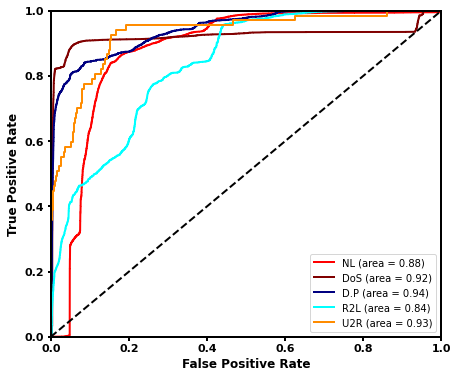

In [44]:
lw = 2
classes = ["NL", "DoS", "D.P", "R2L", "U2R"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_lr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Logistic_Regression")

## Decision tree

In [45]:
pipe_tree = pipe_tree.fit(X_train, y_train)

In [46]:
y_score_tree = pipe_tree.predict_proba(X_test)
fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()
for i in range(n_classes):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test[:, i], y_score_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

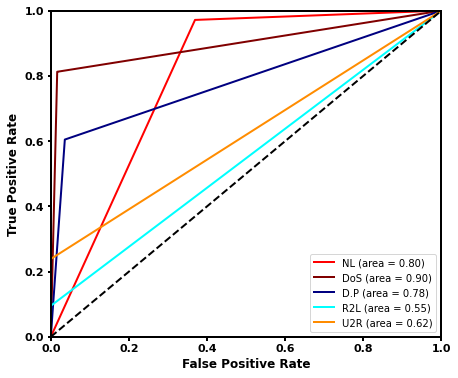

In [47]:
lw = 2
classes = ["NL", "DoS", "D.P", "R2L", "U2R"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_tree[i], tpr_tree[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_tree[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Decision_Tree")

## SVM

In [48]:
pipe_svc = pipe_svc.fit(X_train, y_train)
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [49]:
y_score_svc = pipe_svc.decision_function(X_test)

In [50]:
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()
for i in range(n_classes):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test[:, i], y_score_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

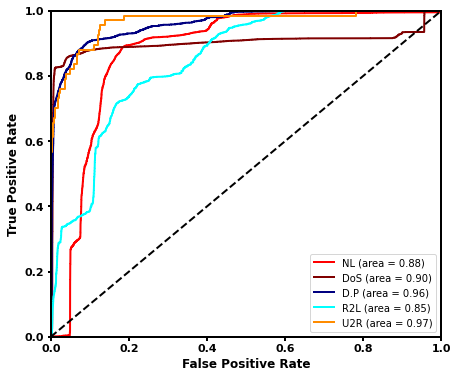

In [51]:
lw = 2
classes = ["NL", "DoS", "D.P", "R2L", "U2R"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svc[i], tpr_svc[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_svc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_SVM")

## Random forest

In [52]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)

In [53]:
y_score_rnd = pipe_rnd.predict_proba(X_test)
fpr_rnd = dict()
tpr_rnd = dict()
roc_auc_rnd = dict()
for i in range(n_classes):
    fpr_rnd[i], tpr_rnd[i], _ = roc_curve(y_test[:, i], y_score_rnd[:, i])
    roc_auc_rnd[i] = auc(fpr_rnd[i], tpr_rnd[i])

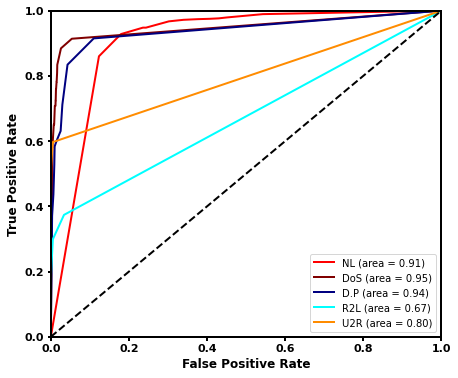

In [54]:
lw = 2
classes = ["NL", "DoS", "D.P", "R2L", "U2R"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rnd[i], tpr_rnd[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_rnd[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Random_Forrest")

## ANN

In [55]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 0.03083209
Iteration 3, loss = 0.02636944
Iteration 4, loss = inf
Iteration 5, loss = 0.02194548
Iteration 6, loss = inf
Iteration 7, loss = 0.01978538
Iteration 8, loss = 0.01902382
Iteration 9, loss = 0.01823784
Iteration 10, loss = 0.01727762
Iteration 11, loss = 0.01661842
Iteration 12, loss = 0.01720314
Iteration 13, loss = 0.01657169
Iteration 14, loss = 0.01630580
Iteration 15, loss = 0.01589579
Iteration 16, loss = 0.01526633
Iteration 17, loss = 0.01506302
Iteration 18, loss = 0.01436422
Iteration 19, loss = 0.01461977
Iteration 20, loss = 0.01422325
Iteration 21, loss = 0.01412750
Iteration 22, loss = 0.01344242
Iteration 23, loss = inf
Iteration 24, loss = 0.01355534
Iteration 25, loss = 0.01321496
Iteration 26, loss = 0.01281289
Iteration 27, loss = 0.01262887
Iteration 28, loss = 0.01296486
Iteration 29, loss = 0.01233335
Iteration 30, loss = 0.01237599
Iteration 31, loss = inf
Iteration 32, loss = 0.01248235
Iteration 33, loss =

In [56]:
y_score_mlp = pipe_mlp.predict_proba(X_test)
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test[:, i], y_score_mlp[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

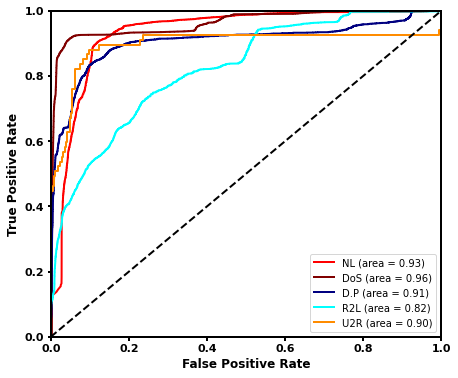

In [57]:
lw = 2
classes = ["NL", "DoS", "D.P", "R2L", "U2R"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_mlp[i], tpr_mlp[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_mlp[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_MLP")